<tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>  Marketing Campaign
                    </b>
                </font>
            </div>
        </td>
    </tr>

**Problem Statement**

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

**Data Defination**

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase



                                                        

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing file
df=pd.read_excel("/content/marketing_campaign.xlsx")

EDA

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
#Filling null values by median of variable income
df['Income'].fillna(df['Income'].median(),inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11])

In [ ]:
Q1=df['MntMeatProducts'].quantile(0.25)
Q3=df['MntMeatProducts'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df=df[(df['MntMeatProducts']<UL) & (df['MntMeatProducts']>LL)]

In [ ]:
df.shape

(2065, 29)

In [ ]:
#Defining Categorical variables
categorical=df[['Education','Marital_Status','Kidhome','Teenhome','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response']]

In [ ]:
categorical.head()

,Education,Marital_Status,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,Graduation,Single,0,0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,Graduation,Single,1,1,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,Graduation,Together,0,0,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,Graduation,Together,1,0,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,PhD,Married,1,0,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
categorical.shape

(2065, 18)

In [ ]:
#Defining Numerical Variables
df2=df[['ID','Year_Birth','Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds',]]

In [ ]:
df2.head()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,58138.0,58,635,88,546,172,88,88
1,2174,1954,46344.0,38,11,1,6,2,1,6
2,4141,1965,71613.0,26,426,49,127,111,21,42
3,6182,1984,26646.0,26,11,4,20,10,3,5
4,5324,1981,58293.0,94,173,43,118,46,27,15


In [ ]:
df2.shape

(2065, 10)

Column =  ID


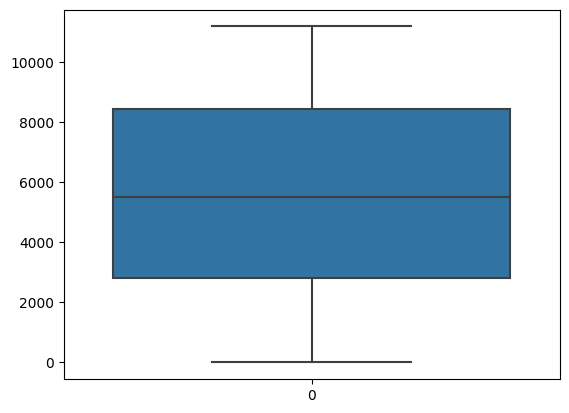

Column =  Year_Birth


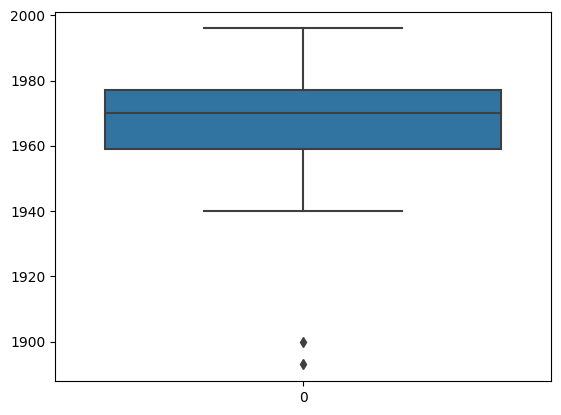

Column =  Income


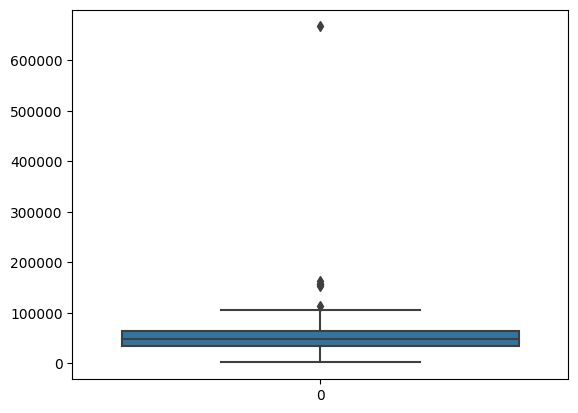

Column =  Recency


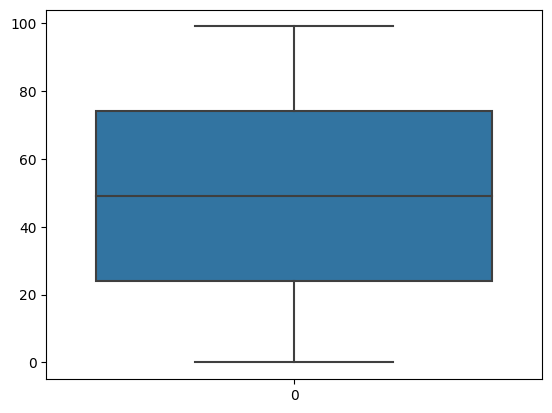

Column =  MntWines


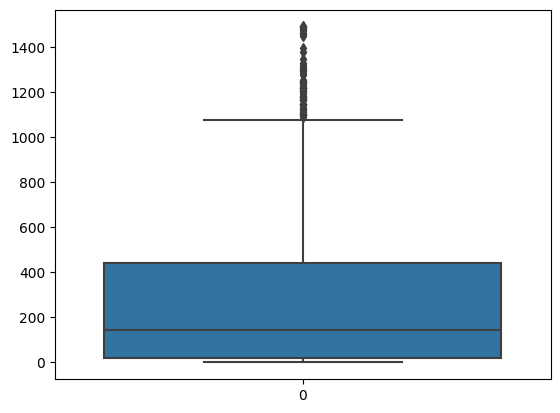

Column =  MntFruits


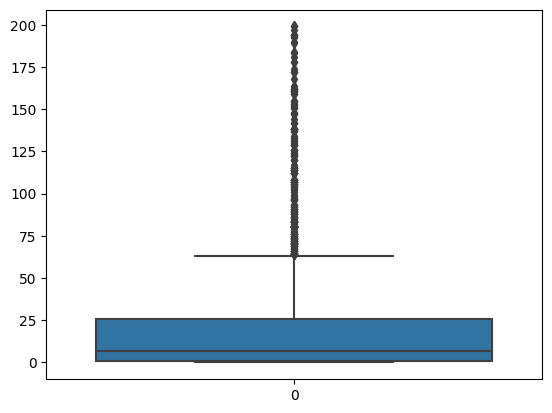

Column =  MntMeatProducts


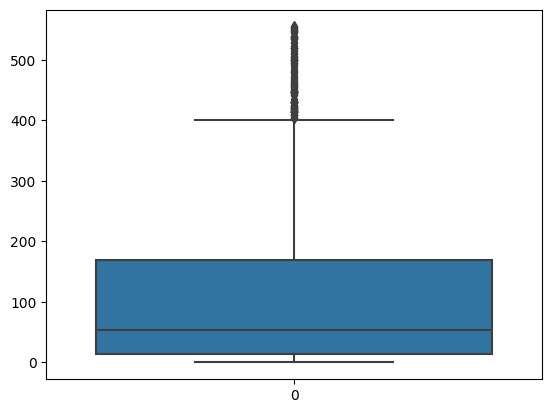

Column =  MntFishProducts


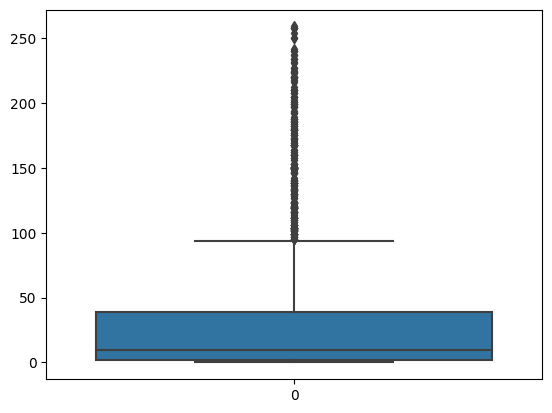

Column =  MntSweetProducts


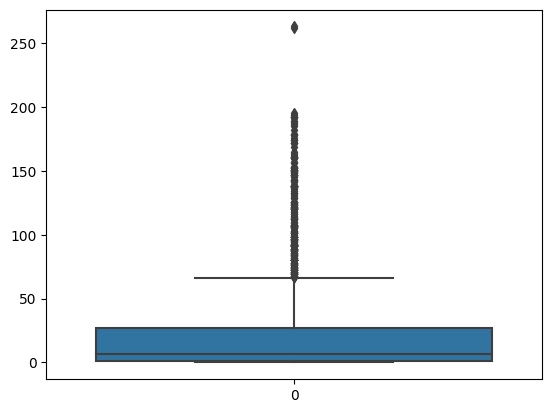

Column =  MntGoldProds


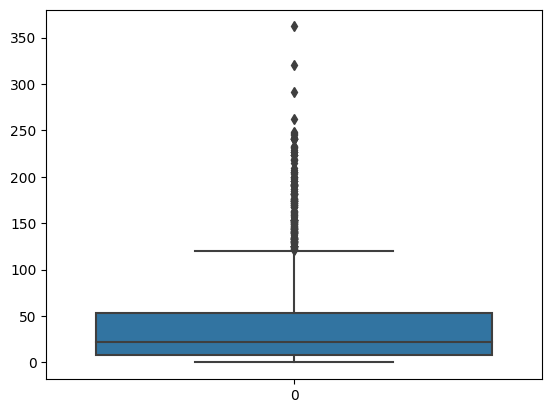

In [ ]:
#Plotting Boxplot for numerical value to identify whether outliers present or not
for i in df2:
  print('Column = ',i)
  sns.boxplot(df[i])
  plt.show()

In [ ]:
sns.countplot(x='Marital_Status',hue='Response',data=df,palette='magma')

In [ ]:
sns.countplot(x='Education',hue='Response',data=df,palette='magma')

<Axes: xlabel='Response', ylabel='count'>

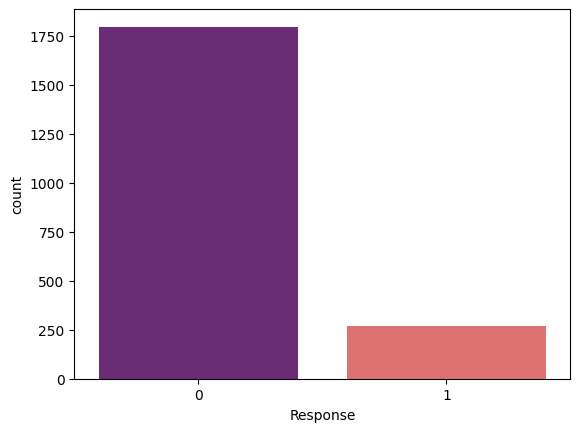

In [ ]:
#Countplot to check target variable is balanced or not
sns.countplot(x='Response',data=df,palette='magma')

In [ ]:
df['Response'].value_counts()

0    1798
1     267
Name: Response, dtype: int64

In [ ]:
#This variable do not contrinute much for model building, so dropping the variables
df.drop(columns=['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [ ]:
#To check the relationship between variables
corr=df.corr()
corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,1.000000,0.007396,0.023416,-0.001437,-0.006747,-0.041755,-0.008398,0.013748,0.016750,-0.016615,...,0.003334,-0.008226,-0.015419,-0.037501,-0.009819,0.020036,-0.004267,-0.007954,0.037334,-0.030221
Year_Birth,0.007396,1.000000,-0.190235,0.252507,-0.387970,-0.018159,-0.182659,-0.039022,-0.088133,-0.040583,...,-0.153990,-0.148597,0.136440,0.049734,-0.062588,-0.008597,-0.016722,-0.021552,-0.043737,0.001367
Income,0.023416,-0.190235,1.000000,-0.382378,0.112199,-0.011346,0.556457,0.397015,0.559204,0.411037,...,0.551309,0.524064,-0.498483,-0.026849,0.184650,0.291694,0.248022,0.093570,-0.026394,0.077532
Kidhome,-0.001437,0.252507,-0.382378,1.000000,-0.104360,0.013785,-0.474375,-0.346299,-0.451039,-0.363307,...,-0.507397,-0.487753,0.408651,0.021844,-0.162739,-0.169768,-0.145456,-0.086044,0.039823,-0.038173
Teenhome,-0.006747,-0.387970,0.112199,-0.104360,1.000000,0.018819,0.093062,-0.105229,-0.123325,-0.148580,...,-0.016470,0.115696,0.049128,-0.038778,0.062095,-0.143663,-0.101680,-0.013570,0.000769,-0.118370
Recency,-0.041755,-0.018159,-0.011346,0.013785,0.018819,1.000000,0.015932,-0.005306,0.008580,-0.005187,...,0.023690,-0.010892,-0.014146,-0.034777,0.017996,-0.002339,-0.011357,-0.004275,0.013584,-0.197640
MntWines,-0.008398,-0.182659,0.556457,-0.474375,0.093062,0.015932,1.000000,0.344609,0.624888,0.365196,...,0.690458,0.645521,-0.266555,0.049387,0.391964,0.450450,0.328117,0.234359,-0.037874,0.196950
MntFruits,0.013748,-0.039022,0.397015,-0.346299,-0.105229,-0.005306,0.344609,1.000000,0.579154,0.619767,...,0.504335,0.481153,-0.382680,-0.001348,-0.014852,0.134892,0.145559,-0.009390,0.004443,0.066094
MntMeatProducts,0.016750,-0.088133,0.559204,-0.451039,-0.123325,0.008580,0.624888,0.579154,1.000000,0.647167,...,0.730681,0.597410,-0.486361,0.006656,0.098959,0.303313,0.282891,0.054239,-0.019746,0.162534
MntFishProducts,-0.016615,-0.040583,0.411037,-0.363307,-0.148580,-0.005187,0.365196,0.619767,0.647167,1.000000,...,0.577509,0.451208,-0.418163,-0.008074,-0.011221,0.179493,0.221706,0.008647,-0.014716,0.080875


<Axes: >

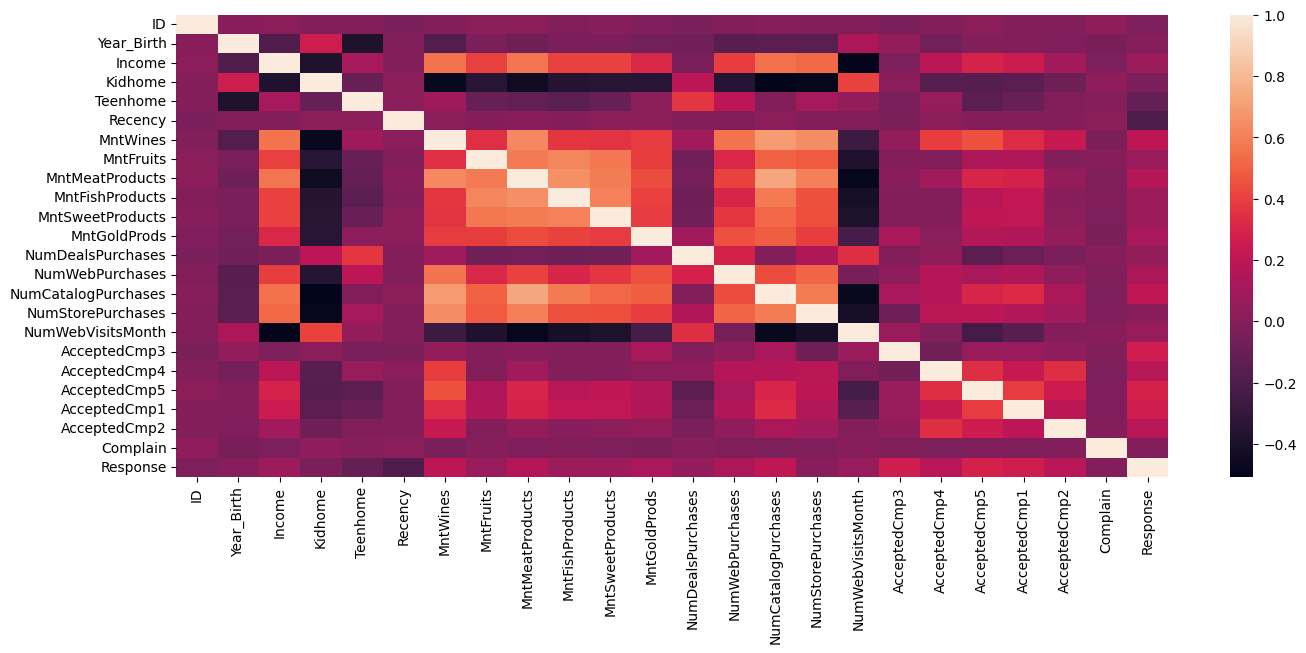

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(corr,annot=False,cbar=True)

In [ ]:
#Coverting Year Birth into age of customer
df['Age'] = date.today().year - df['Year_Birth']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,42


In [ ]:
#Number of days as a customer
df['Customer_Days'] = (pd.to_datetime("now") - pd.to_datetime(df['Dt_Customer'])) // np.timedelta64(1,'D')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,66,4007
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,69,3457
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,58,3656
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,39,3483
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,42,3505


In [ ]:
df.drop(columns=['Dt_Customer','Year_Birth'],axis=1,inplace=True)

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,66,4007
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,69,3457
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,58,3656
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,39,3483
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,42,3505


In [ ]:
#Converting Categorical to numeric by ordering manual
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
Education=["Basic","Graduation","2n Cycle","Master","PhD"]
enc=OrdinalEncoder(categories=[Education])
enc.fit_transform(df[["Education"]])

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [3.],
       [4.]])

In [ ]:
df[['Education']]=enc.fit_transform(df[["Education"]])

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days
0,5524,1.0,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,66,4007
1,2174,1.0,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,69,3457
2,4141,1.0,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,58,3656
3,6182,1.0,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,39,3483
4,5324,4.0,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,42,3505


In [ ]:
#Converting Categorical to numerical randomly
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["Marital_Status"] = Encoder.fit_transform(df["Marital_Status"])

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days
0,5524,1.0,4,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,66,4007
1,2174,1.0,4,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,69,3457
2,4141,1.0,5,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,58,3656
3,6182,1.0,5,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,39,3483
4,5324,4.0,3,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,42,3505


In [ ]:
#Defining x and y
x=df.drop(columns='Response')
y=df['Response']

In [ ]:
x.shape

(2065, 26)

In [ ]:
#Best Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

mdlsel= SelectKBest(chi2,k=25)
mdlsel.fit(x,y)
ix=mdlsel.get_support()
df4=pd.DataFrame(mdlsel.transform(x),columns=x.columns.values[ix])

In [ ]:
df4.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Customer_Days
0,5524.0,1.0,4.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4007.0
1,2174.0,1.0,4.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3457.0
2,4141.0,1.0,5.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3656.0
3,6182.0,1.0,5.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3483.0
4,5324.0,4.0,3.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3505.0


In [ ]:
x1=df4
y1=df['Response']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [ ]:
#Balancing target variable
from sklearn import preprocessing

In [ ]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=42)
x_train,y_train=smt.fit_resample(x_train,y_train)

In [ ]:
y_train.value_counts()

0    1337
1    1337
Name: Response, dtype: int64

In [ ]:
#Scaling the data
from sklearn.preprocessing import RobustScaler

In [ ]:
rs=RobustScaler()
x_train_scl=rs.fit_transform(x_train)
x_test_scl=rs.transform(x_test)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train_scl,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(x_test_scl)

In [ ]:
def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

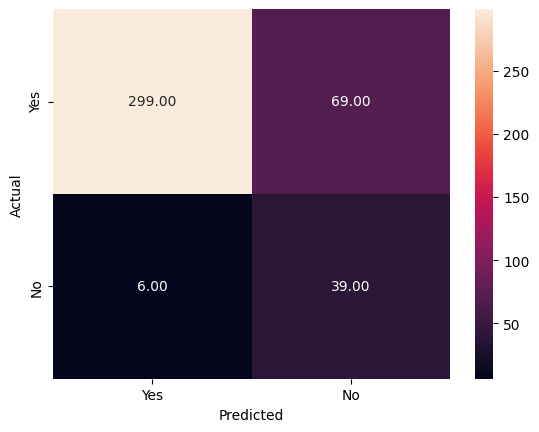

In [ ]:
draw_cm(y_test,y_pred)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,roc_curve

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       368
           1       0.36      0.87      0.51        45

    accuracy                           0.82       413
   macro avg       0.67      0.84      0.70       413
weighted avg       0.91      0.82      0.85       413



In [ ]:
def ROC_Curve(Actual,Predicted):
  fpr,tpr,thresholds = roc_curve(Actual,Predicted)
  roc = plt.plot(fpr,tpr)
  plt.xlabel('False Possitive Rate')
  plt.ylabel('True Possitive Rate')
  plt.title('ROC Curve')
  plt.show()
  Threshold=thresholds
  return roc,thresholds

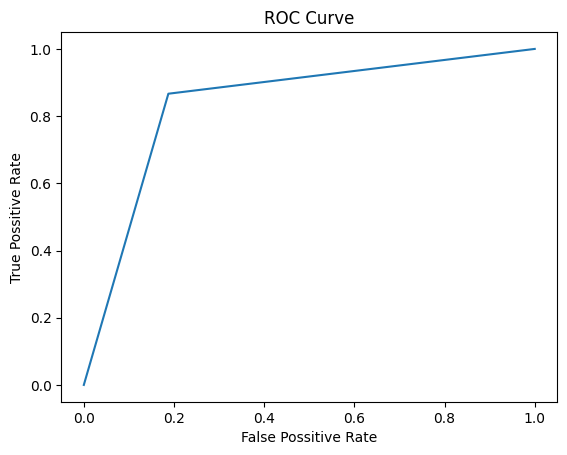

([<matplotlib.lines.Line2D at 0x7c6d31873040>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred)

In [ ]:
metrics.roc_auc_score(y_test,y_pred)

0.8395833333333333

In [ ]:
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

In [ ]:
result_tabulation = pd.DataFrame(columns = cols)

In [ ]:
Logistic_reg = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred)})

In [ ]:

result_tabulation = result_tabulation.append(Logistic_reg, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804


Decision tree algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
clf_gini=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split =6)

In [ ]:
clf_gini.fit(x_train_scl,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=6)

In [ ]:
y_pred_gini=clf_gini.predict(x_test_scl)

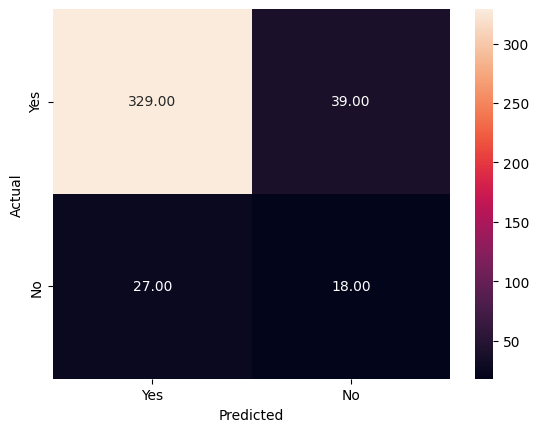

In [ ]:
draw_cm(y_test,y_pred_gini)

In [ ]:
accuracy_score(y_test,y_pred_gini)

0.8401937046004843

In [ ]:
print(metrics.classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       368
           1       0.32      0.40      0.35        45

    accuracy                           0.84       413
   macro avg       0.62      0.65      0.63       413
weighted avg       0.86      0.84      0.85       413



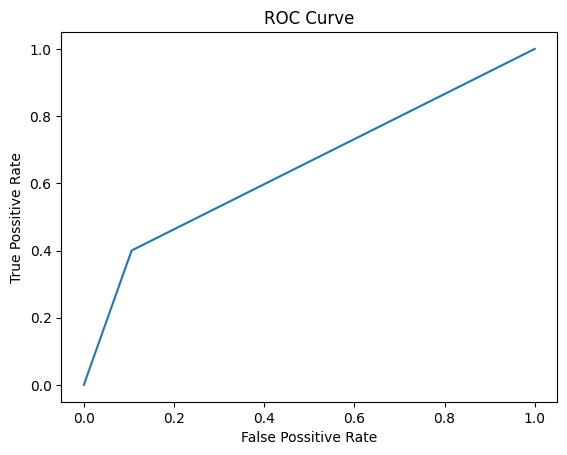

([<matplotlib.lines.Line2D at 0x7c6d39936860>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_gini)

In [ ]:
metrics.roc_auc_score(y_test,y_pred_gini)

0.6470108695652174

In [ ]:
Decision_Tree = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gini),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gini),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gini),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gini),
                 'f1-score':metrics.f1_score(y_test, y_pred_gini)})



In [ ]:
(result_tabulation = result_tabulation.append(Decision_Tree, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941


Grid search for decision tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
tunning_dt=[{'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_split':range(1,30)}]

In [ ]:
rs_dt=RandomizedSearchCV(DecisionTreeClassifier(),tunning_dt,scoring='accuracy',cv=10)

In [ ]:
rs_dt.fit(x_train_scl,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(1, 10),
                                         'min_samples_split': range(1, 30)}],
                   scoring='accuracy')

In [ ]:
rs_dt.best_params_

{'min_samples_split': 19, 'max_depth': 8, 'criterion': 'entropy'}

In [ ]:
rs_dt.best_score_

0.8628179328078707

In [ ]:
clf_gini_tunned=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split =19)

In [ ]:
clf_gini_tunned.fit(x_train_scl,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=19)

In [ ]:
y_pred_gini_tunned=clf_gini_tunned.predict(x_test_scl)

In [ ]:
print(metrics.classification_report(y_test,y_pred_gini_tunned))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       368
           1       0.30      0.40      0.34        45

    accuracy                           0.83       413
   macro avg       0.61      0.64      0.62       413
weighted avg       0.86      0.83      0.84       413



In [ ]:
Decision_Tree_tunned = pd.Series({'Model': "Decision Tree Tunned",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gini_tunned),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gini_tunned),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gini_tunned),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gini_tunned),
                 'f1-score':metrics.f1_score(y_test, y_pred_gini_tunned)})

In [ ]:
result_tabulation = result_tabulation.append(Decision_Tree_tunned, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857


Random Forest algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(x_train_scl,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred1 = rfc.predict(x_test_scl)

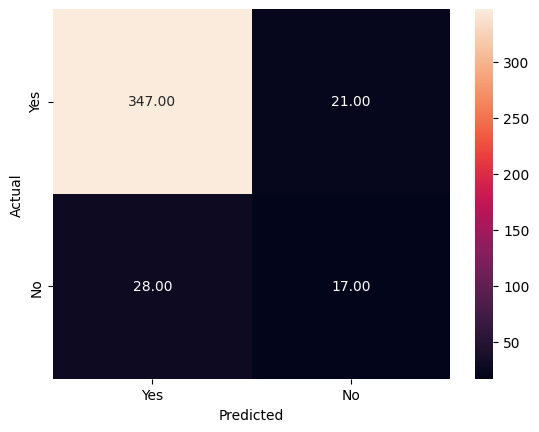

In [ ]:
draw_cm(y_test,y_pred1)

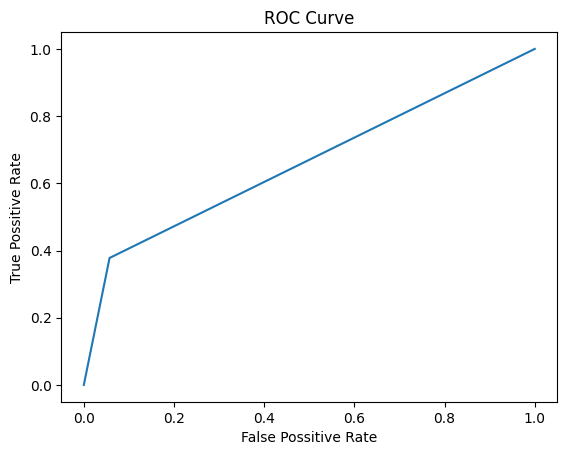

([<matplotlib.lines.Line2D at 0x7c6d3181a020>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred1)

In [ ]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       368
           1       0.45      0.38      0.41        45

    accuracy                           0.88       413
   macro avg       0.69      0.66      0.67       413
weighted avg       0.87      0.88      0.88       413



In [ ]:
Random_Forest = pd.Series({'Model': "Random Forest",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred1),
                 'f1-score':metrics.f1_score(y_test, y_pred1)})

In [ ]:
result_tabulation = result_tabulation.append(Random_Forest, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639


Random forest GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_parameters = [{'max_depth': [10, 15],'n_estimators': [10,20], 'max_features': ['sqrt', 0.2]}]

In [ ]:
radm_clf = RandomForestClassifier()

In [ ]:
clf = GridSearchCV(radm_clf,tuned_parameters, cv=5, scoring='accuracy')

In [ ]:
clf.fit(x_train_scl,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='accuracy')

In [ ]:
clf.best_score_

0.9364373971787602

In [ ]:
clf.best_params_

{'max_depth': 15, 'max_features': 0.2, 'n_estimators': 20}

In [ ]:
rfc_tunned = RandomForestClassifier(max_depth=10,max_features=0.2,n_estimators=20)

In [ ]:
rfc_tunned.fit(x_train_scl,y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, n_estimators=20)

In [ ]:
y_pred1_tunned = rfc_tunned.predict(x_test_scl)

In [ ]:
print(metrics.classification_report(y_test,y_pred1_tunned))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       368
           1       0.38      0.40      0.39        45

    accuracy                           0.86       413
   macro avg       0.65      0.66      0.66       413
weighted avg       0.87      0.86      0.87       413



In [ ]:
Random_Forest_tunned = pd.Series({'Model': "Random Forest tunned",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred1_tunned),
                 'Precision Score': metrics.precision_score(y_test, y_pred1_tunned),
                 'Recall Score': metrics.recall_score(y_test, y_pred1_tunned),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred1_tunned),
                 'f1-score':metrics.f1_score(y_test, y_pred1_tunned)})

In [ ]:
result_tabulation = result_tabulation.append(Random_Forest_tunned, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639
4,Random Forest tunned,0.660598,0.382979,0.400000,0.864407,0.391304


Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [ ]:
gradient_booster.fit(x_train_scl,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred2=gradient_booster.predict(x_test_scl)

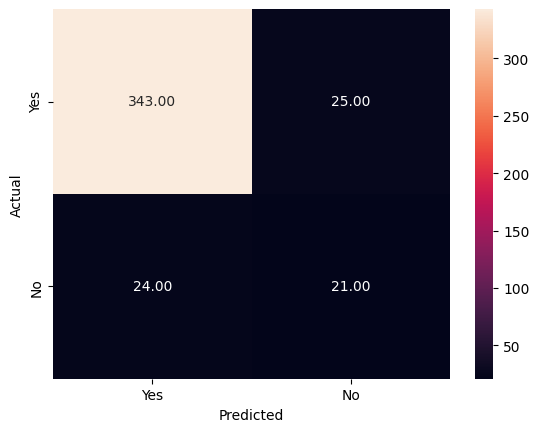

In [ ]:
draw_cm(y_test,y_pred2)

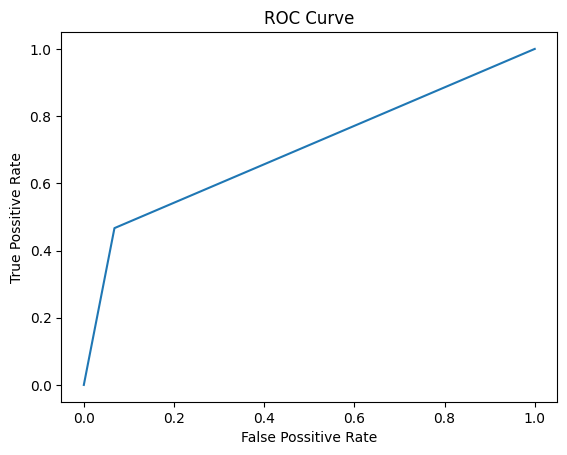

([<matplotlib.lines.Line2D at 0x7c6d3175be50>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred2)

In [ ]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       368
           1       0.46      0.47      0.46        45

    accuracy                           0.88       413
   macro avg       0.70      0.70      0.70       413
weighted avg       0.88      0.88      0.88       413



In [ ]:
Grad_boosting= pd.Series({'Model': "Gradient Boosting ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred2),
                 'Precision Score': metrics.precision_score(y_test, y_pred2),
                 'Recall Score': metrics.recall_score(y_test, y_pred2),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred2),
                 'f1-score':metrics.f1_score(y_test, y_pred2)})

In [ ]:
result_tabulation = result_tabulation.append(Grad_boosting , ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639
4,Random Forest tunned,0.660598,0.382979,0.400000,0.864407,0.391304
5,Gradient Boosting,0.699366,0.456522,0.466667,0.881356,0.461538


Support Vector Machine using Polynomial Kernal with degree of polynomial = 2

In [ ]:
from sklearn.svm import SVC

In [ ]:
svclassifier_Poly = SVC(kernel='poly', degree = 2, gamma = 'auto')
svclassifier_Poly.fit(x_train_scl, y_train)

SVC(degree=2, gamma='auto', kernel='poly')

In [ ]:
y_pred_Poly_d  = svclassifier_Poly.predict(x_test_scl)

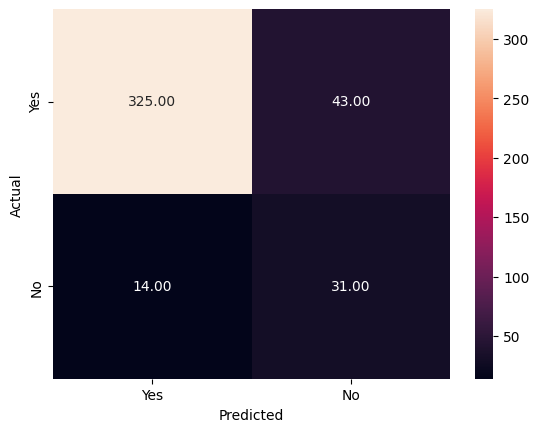

In [ ]:
draw_cm(y_test,y_pred_Poly_d)

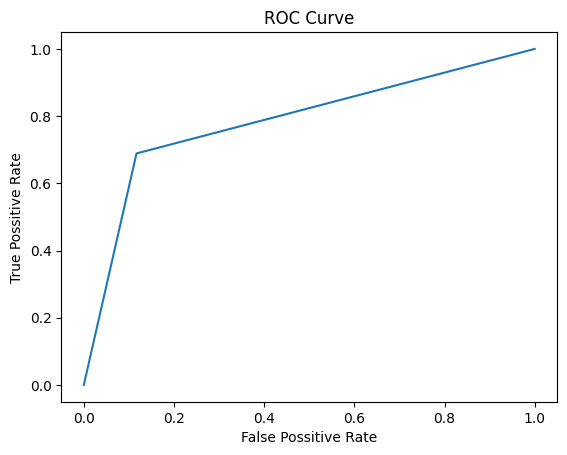

([<matplotlib.lines.Line2D at 0x7c6d3162a590>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_Poly_d)

In [ ]:
print(metrics.classification_report(y_test,y_pred_Poly_d))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       368
           1       0.42      0.69      0.52        45

    accuracy                           0.86       413
   macro avg       0.69      0.79      0.72       413
weighted avg       0.90      0.86      0.88       413



In [ ]:
SVM = pd.Series({'Model': "SVM ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})

In [ ]:
result_tabulation = result_tabulation.append(SVM , ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639
4,Random Forest tunned,0.660598,0.382979,0.400000,0.864407,0.391304
5,Gradient Boosting,0.699366,0.456522,0.466667,0.881356,0.461538
6,SVM,0.786021,0.418919,0.688889,0.861985,0.521008


XG Boosting

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 200, subsample= 0.8)
xgb_model.fit(x_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xg=xgb_model.predict(x_test_scl)

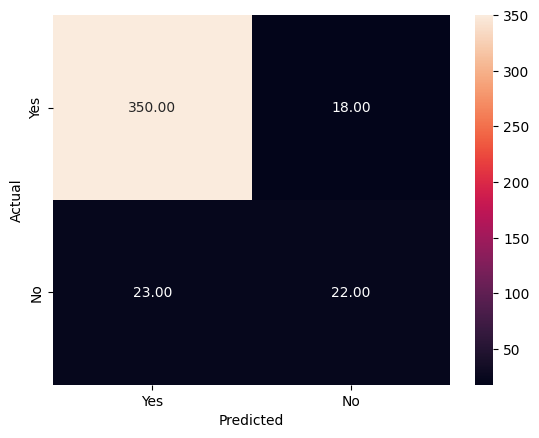

In [ ]:
draw_cm(y_test,y_pred_xg)

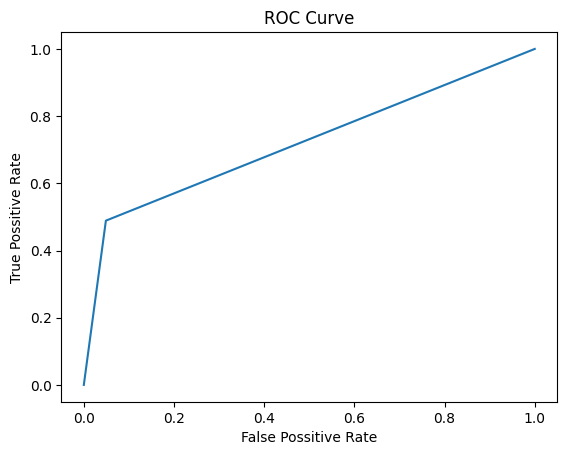

([<matplotlib.lines.Line2D at 0x7c6d314186d0>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_xg)

In [ ]:
print(metrics.classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       368
           1       0.55      0.49      0.52        45

    accuracy                           0.90       413
   macro avg       0.74      0.72      0.73       413
weighted avg       0.90      0.90      0.90       413



GridSearchCv for XG boosting

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
}

In [ ]:
scoring = 'accuracy'
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scoring, cv=5)
grid_search.fit(x_train_scl, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

In [ ]:
grid_search.best_score_

0.9241016486401344

In [ ]:
XG_boosting= pd.Series({'Model': "XG Boosting ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_xg),
                 'Precision Score': metrics.precision_score(y_test, y_pred_xg),
                 'Recall Score': metrics.recall_score(y_test, y_pred_xg),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_xg),
                 'f1-score':metrics.f1_score(y_test, y_pred_xg)})

In [ ]:
result_tabulation = result_tabulation.append(XG_boosting , ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639
4,Random Forest tunned,0.660598,0.382979,0.400000,0.864407,0.391304
5,Gradient Boosting,0.699366,0.456522,0.466667,0.881356,0.461538
6,SVM,0.786021,0.418919,0.688889,0.861985,0.521008
7,XG Boosting,0.719988,0.550000,0.488889,0.900726,0.517647


In [ ]:
from xgboost import XGBClassifier
xgb_model_tunned = XGBClassifier(learning_rate= 0.2, max_depth= 7, n_estimators= 100, subsample= 0.8)
xgb_model_tunned.fit(x_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xg_tunned=xgb_model_tunned.predict(x_test_scl)

In [ ]:
print(metrics.classification_report(y_test,y_pred_xg_tunned))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       368
           1       0.53      0.51      0.52        45

    accuracy                           0.90       413
   macro avg       0.74      0.73      0.73       413
weighted avg       0.90      0.90      0.90       413



In [ ]:
XG_boosting_tunned= pd.Series({'Model': "XG Boosting Tunned",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_xg_tunned),
                 'Precision Score': metrics.precision_score(y_test, y_pred_xg_tunned),
                 'Recall Score': metrics.recall_score(y_test, y_pred_xg_tunned),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_xg_tunned),
                 'f1-score':metrics.f1_score(y_test, y_pred_xg_tunned)})

In [ ]:
result_tabulation = result_tabulation.append(XG_boosting_tunned , ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639
4,Random Forest tunned,0.660598,0.382979,0.400000,0.864407,0.391304
5,Gradient Boosting,0.699366,0.456522,0.466667,0.881356,0.461538
6,SVM,0.786021,0.418919,0.688889,0.861985,0.521008
7,XG Boosting,0.719988,0.550000,0.488889,0.900726,0.517647
8,XG Boosting Tunned,0.728382,0.534884,0.511111,0.898305,0.522727


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(x_train_scl, y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb.predict(x_test_scl)

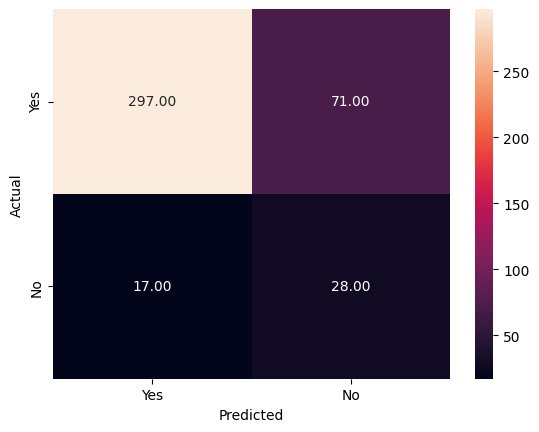

In [ ]:
draw_cm(y_test,y_pred_nb)

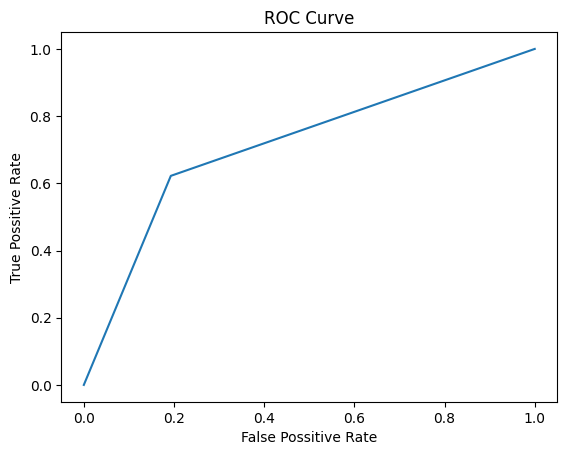

([<matplotlib.lines.Line2D at 0x7c6d31337e50>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_nb)

In [ ]:
print(metrics.classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       368
           1       0.28      0.62      0.39        45

    accuracy                           0.79       413
   macro avg       0.61      0.71      0.63       413
weighted avg       0.87      0.79      0.82       413



In [ ]:
Gaussian_Naive_bayes = pd.Series({'Model': "Gaussian NB",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_nb),
                 'Precision Score': metrics.precision_score(y_test, y_pred_nb),
                 'Recall Score': metrics.recall_score(y_test, y_pred_nb),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_nb),
                 'f1-score':metrics.f1_score(y_test, y_pred_nb)})

In [ ]:
result_tabulation = result_tabulation.append(Gaussian_Naive_bayes, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639
4,Random Forest tunned,0.660598,0.382979,0.400000,0.864407,0.391304
5,Gradient Boosting,0.699366,0.456522,0.466667,0.881356,0.461538
6,SVM,0.786021,0.418919,0.688889,0.861985,0.521008
7,XG Boosting,0.719988,0.550000,0.488889,0.900726,0.517647
8,XG Boosting Tunned,0.728382,0.534884,0.511111,0.898305,0.522727
9,Gaussian NB,0.714644,0.282828,0.622222,0.786925,0.388889


K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train_scl, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(x_test_scl)

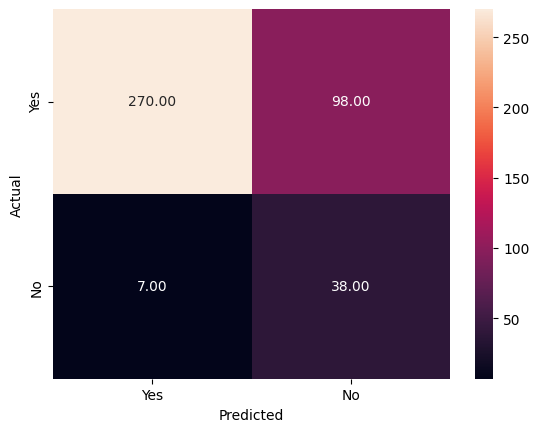

In [ ]:
draw_cm(y_test,y_pred_knn)

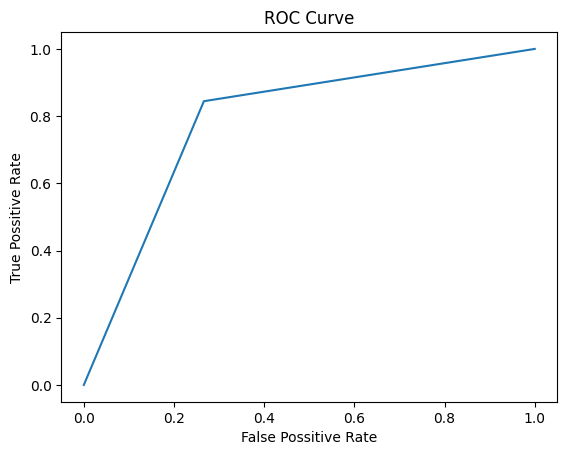

([<matplotlib.lines.Line2D at 0x7c6d31234fd0>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_knn)

In [ ]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84       368
           1       0.28      0.84      0.42        45

    accuracy                           0.75       413
   macro avg       0.63      0.79      0.63       413
weighted avg       0.90      0.75      0.79       413



In [ ]:
K_Nearest_Neighbours = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_knn),
                 'Precision Score': metrics.precision_score(y_test, y_pred_knn),
                 'Recall Score': metrics.recall_score(y_test, y_pred_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_knn),
                 'f1-score':metrics.f1_score(y_test, y_pred_knn)})

In [ ]:
result_tabulation = result_tabulation.append(K_Nearest_Neighbours, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639
4,Random Forest tunned,0.660598,0.382979,0.400000,0.864407,0.391304
5,Gradient Boosting,0.699366,0.456522,0.466667,0.881356,0.461538
6,SVM,0.786021,0.418919,0.688889,0.861985,0.521008
7,XG Boosting,0.719988,0.550000,0.488889,0.900726,0.517647
8,XG Boosting Tunned,0.728382,0.534884,0.511111,0.898305,0.522727
9,Gaussian NB,0.714644,0.282828,0.622222,0.786925,0.388889


In [ ]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(hidden_layer_sizes = (10,10,10), max_iter=100)
#MLPClassifier?
NN.fit(x_train_scl,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=100)

In [ ]:
y_pred_nn=NN.predict(x_test_scl)

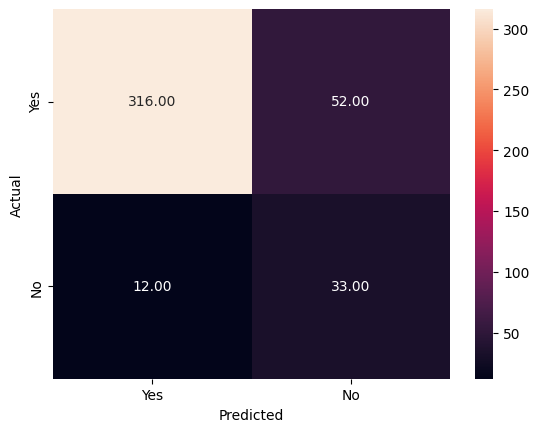

In [ ]:
draw_cm(y_test,y_pred_nn)

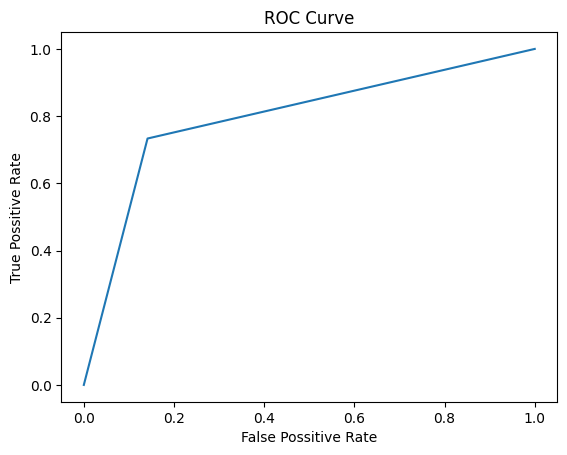

([<matplotlib.lines.Line2D at 0x7c6d3129f9d0>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_nn)

In [ ]:
print(metrics.classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       368
           1       0.39      0.73      0.51        45

    accuracy                           0.85       413
   macro avg       0.68      0.80      0.71       413
weighted avg       0.90      0.85      0.86       413



In [ ]:
Neural_network = pd.Series({'Model': "Neural Network",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_nn),
                 'Precision Score': metrics.precision_score(y_test, y_pred_nn),
                 'Recall Score': metrics.recall_score(y_test, y_pred_nn),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_nn),
                 'f1-score':metrics.f1_score(y_test, y_pred_nn)})

In [ ]:
result_tabulation = result_tabulation.append(Neural_network , ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.839583,0.361111,0.866667,0.818402,0.509804
1,Decision Tree,0.647011,0.315789,0.400000,0.840194,0.352941
2,Decision Tree Tunned,0.642935,0.300000,0.400000,0.832930,0.342857
3,Random Forest,0.660356,0.447368,0.377778,0.881356,0.409639
4,Random Forest tunned,0.660598,0.382979,0.400000,0.864407,0.391304
5,Gradient Boosting,0.699366,0.456522,0.466667,0.881356,0.461538
6,SVM,0.786021,0.418919,0.688889,0.861985,0.521008
7,XG Boosting,0.719988,0.550000,0.488889,0.900726,0.517647
8,XG Boosting Tunned,0.728382,0.534884,0.511111,0.898305,0.522727
9,Gaussian NB,0.714644,0.282828,0.622222,0.786925,0.388889


### Tracking Model Performance
#### Accuracy scores for each of the models when running on the train/test data split. As we can see, the XG Boosting and Random Forest models i.e. ensemble methods generally performed the best. Accuracy is as follows;

|Model Name|Type|Accuracy score|
|:--|:--|:--
|LR|Logistic Regression|81.8|
|DT|Decission Tree Classifier|83.0|
|DT(T)|Decission Tree Classifier(Tunned)|82.0|
|RF|Random Forest Classifier|88.1|
|RF(T)|Random Forest Classifier(Tunned)|86.9|
|GB|Gradient Boosting|88.1|
|XGB|XG Boosting|90.0|
|XGB(T)|XG Boosting|89.8|
|NB|Gaussian Naive Bayes Classifier|78.7|
|KNN|K Nearest Neighbors Classifier|74.4|
|NN|Neural Network|84.5|